In [1]:
import numpy as np 
import pandas as pd 


In [2]:
#load dataset - since i know they all include the same amount of rows, i am going to merge them into one 
# prior to this i have loaded and played with my data in excel to make sure it looks good 
rcn1 = pd.read_csv("canadiannavy.csv") # 35 tweets 
rcn2 = pd.read_csv("rcn.csv") #100 tweets
rcn3 =  pd.read_csv("royalcanadiannavy.csv") #100 tweets 

#lets look at the shape to make sure 
print(rcn1.shape)
print(rcn2.shape)
print(rcn3.shape)
# they all have 6 coloumns 

rcn = pd.merge(rcn1,rcn2, how= "outer")
rcn = pd.merge(rcn, rcn3, how="outer")
print(rcn.shape)
#looks like its all here - lets check what the new dataset looks like
rcn

#wonderful, lets move to the next step 


(35, 6)
(100, 6)
(100, 6)
(235, 6)


,tweetDate,content,twitterProfile,tweetUrl,timestamp,query
0,Sat Apr 01 22:34:33 +0000 2023,Canadian Navy offers no strings attached progr...,https://twitter.com/HandlerCND,https://twitter.com/HandlerCND/status/16422944...,2023-04-02T00:02:27.854Z,canadiannavy
1,Fri Mar 31 14:22:34 +0000 2023,Bewverly Saftig #CanadianNavy #Navy #Military ...,https://twitter.com/SamuelsCND,https://twitter.com/SamuelsCND/status/16418082...,2023-04-02T00:02:27.854Z,canadiannavy
2,Sat Feb 11 22:25:46 +0000 2023,Due to lack of #CanadianNavy Relic from the #B...,https://twitter.com/TerryToll,https://twitter.com/TerryToll/status/162453519...,2023-04-02T00:02:27.854Z,canadiannavy
3,Wed Mar 08 17:16:48 +0000 2023,"Welcome to Port Alberni Terminals, @HMCSOTTAWA...",https://twitter.com/PAPortAuthority,https://twitter.com/PAPortAuthority/status/163...,2023-04-02T00:02:27.854Z,canadiannavy
4,Sat Apr 01 22:34:35 +0000 2023,Canadian Navy offers no strings attached progr...,https://twitter.com/SamuelsCND,https://twitter.com/SamuelsCND/status/16422944...,2023-04-02T00:02:27.854Z,canadiannavy
...,...,...,...,...,...,...
230,Fri Mar 24 12:28:15 +0000 2023,🇨🇦⚓ The Royal Canadian Navy Halifax-class mult...,https://twitter.com/steffanwatkins,https://twitter.com/steffanwatkins/status/1639...,2023-04-02T00:00:18.376Z,royal Canadian navy
231,Fri Mar 24 13:05:29 +0000 2023,🇨🇦⚓ Royal Canadian Navy Kingston-class maritim...,https://twitter.com/steffanwatkins,https://twitter.com/steffanwatkins/status/1639...,2023-04-02T00:00:18.376Z,royal Canadian navy
232,Sun Mar 26 15:59:50 +0000 2023,Royal Canadian Navy frigate HMCS Montreal depa...,https://twitter.com/kldmr68501233,https://twitter.com/kldmr68501233/status/16400...,2023-04-02T00:00:18.376Z,royal Canadian navy
233,Thu Mar 30 16:53:51 +0000 2023,https://t.co/U2iUbtMe2V Wins Software Contract...,https://twitter.com/worldnews_guru,https://twitter.com/worldnews_guru/status/1641...,2023-04-02T00:00:18.376Z,royal Canadian navy


### Data cleaning & pre-processing

This is how I clean my data: 
- check my data to see what i have and remove colomns i will not need during my analysis 
     - in my case this was everything but the actual tweet itself, the dates and timestamp - since I want to do time series futher in the project
- removed unncessary characters in a coloumns 
- made tweetDate usable for time series
    

In [3]:
# checking and removing coloumns -- specifically tweeturl and timestamp
rcn = rcn.drop(['tweetUrl','timestamp'] ,axis =1)

In [4]:
#lets remove the excess for twitter profile and just keep the profile 
rcn['twitterProfile'] = rcn['twitterProfile'].str.replace('https://twitter.com/', '')

In [5]:
rcn

,tweetDate,content,twitterProfile,query
0,Sat Apr 01 22:34:33 +0000 2023,Canadian Navy offers no strings attached progr...,HandlerCND,canadiannavy
1,Fri Mar 31 14:22:34 +0000 2023,Bewverly Saftig #CanadianNavy #Navy #Military ...,SamuelsCND,canadiannavy
2,Sat Feb 11 22:25:46 +0000 2023,Due to lack of #CanadianNavy Relic from the #B...,TerryToll,canadiannavy
3,Wed Mar 08 17:16:48 +0000 2023,"Welcome to Port Alberni Terminals, @HMCSOTTAWA...",PAPortAuthority,canadiannavy
4,Sat Apr 01 22:34:35 +0000 2023,Canadian Navy offers no strings attached progr...,SamuelsCND,canadiannavy
...,...,...,...,...
230,Fri Mar 24 12:28:15 +0000 2023,🇨🇦⚓ The Royal Canadian Navy Halifax-class mult...,steffanwatkins,royal Canadian navy
231,Fri Mar 24 13:05:29 +0000 2023,🇨🇦⚓ Royal Canadian Navy Kingston-class maritim...,steffanwatkins,royal Canadian navy
232,Sun Mar 26 15:59:50 +0000 2023,Royal Canadian Navy frigate HMCS Montreal depa...,kldmr68501233,royal Canadian navy
233,Thu Mar 30 16:53:51 +0000 2023,https://t.co/U2iUbtMe2V Wins Software Contract...,worldnews_guru,royal Canadian navy


In [9]:
# I Want to make the date usable for time series so lets play around with tweetdate
rcn['tweetDate'] = rcn['tweetDate'].str.replace('+0000', '')

rcn['timestamp'] = ''

for index, row in rcn.iterrows():
    # extract the area of interest from the text column using string slicing
    extracted_value = row['tweetDate'][11:19] # assuming we want to extract the string between the parentheses
    
    tweetDate = row['tweetDate'].replace(extracted_value, '').strip()
    # store the extracted value in the new column
    rcn.at[index, 'timestamp'] = extracted_value
    rcn.at[index, 'tweetDate'] = tweetDate

# print the updated dataframe
rcn


,tweetDate,content,twitterProfile,query,timestamp
0,Sat Apr 01 2023,Canadian Navy offers no strings attached progr...,HandlerCND,canadiannavy,22:34:33
1,Fri Mar 31 2023,Bewverly Saftig #CanadianNavy #Navy #Military ...,SamuelsCND,canadiannavy,14:22:34
2,Sat Feb 11 2023,Due to lack of #CanadianNavy Relic from the #B...,TerryToll,canadiannavy,22:25:46
3,Wed Mar 08 2023,"Welcome to Port Alberni Terminals, @HMCSOTTAWA...",PAPortAuthority,canadiannavy,17:16:48
4,Sat Apr 01 2023,Canadian Navy offers no strings attached progr...,SamuelsCND,canadiannavy,22:34:35
...,...,...,...,...,...
230,Fri Mar 24 2023,🇨🇦⚓ The Royal Canadian Navy Halifax-class mult...,steffanwatkins,royal Canadian navy,12:28:15
231,Fri Mar 24 2023,🇨🇦⚓ Royal Canadian Navy Kingston-class maritim...,steffanwatkins,royal Canadian navy,13:05:29
232,Sun Mar 26 2023,Royal Canadian Navy frigate HMCS Montreal depa...,kldmr68501233,royal Canadian navy,15:59:50
233,Thu Mar 30 2023,https://t.co/U2iUbtMe2V Wins Software Contract...,worldnews_guru,royal Canadian navy,16:53:51


In [10]:
# changing the date to something i can use for time series 
rcn['tweetDate'] = pd.to_datetime(rcn['tweetDate'])
rcn 

#my dataset is now perfect for use :) 

,tweetDate,content,twitterProfile,query,timestamp
0,2023-04-01,Canadian Navy offers no strings attached progr...,HandlerCND,canadiannavy,22:34:33
1,2023-03-31,Bewverly Saftig #CanadianNavy #Navy #Military ...,SamuelsCND,canadiannavy,14:22:34
2,2023-02-11,Due to lack of #CanadianNavy Relic from the #B...,TerryToll,canadiannavy,22:25:46
3,2023-03-08,"Welcome to Port Alberni Terminals, @HMCSOTTAWA...",PAPortAuthority,canadiannavy,17:16:48
4,2023-04-01,Canadian Navy offers no strings attached progr...,SamuelsCND,canadiannavy,22:34:35
...,...,...,...,...,...
230,2023-03-24,🇨🇦⚓ The Royal Canadian Navy Halifax-class mult...,steffanwatkins,royal Canadian navy,12:28:15
231,2023-03-24,🇨🇦⚓ Royal Canadian Navy Kingston-class maritim...,steffanwatkins,royal Canadian navy,13:05:29
232,2023-03-26,Royal Canadian Navy frigate HMCS Montreal depa...,kldmr68501233,royal Canadian navy,15:59:50
233,2023-03-30,https://t.co/U2iUbtMe2V Wins Software Contract...,worldnews_guru,royal Canadian navy,16:53:51


## Sentiment analysis 

In [11]:
# lets clena up the tweets a little bit 
import re

#Removing RT, Punctuation etc
pattern = r'[@#]\w+'
# apply the regular expression pattern to remove hashtags and '@' symbols from the tweet column
rcn['content'] = rcn['content'].apply(lambda x: re.sub(pattern, '', x))

# print the updated dataframe
rcn

,tweetDate,content,twitterProfile,query,timestamp
0,2023-04-01,Canadian Navy offers no strings attached progr...,HandlerCND,canadiannavy,22:34:33
1,2023-03-31,Bewverly Saftig [Video] https://t.co/W5D3...,SamuelsCND,canadiannavy,14:22:34
2,2023-02-11,Due to lack of Relic from the will pick up t...,TerryToll,canadiannavy,22:25:46
3,2023-03-08,"Welcome to Port Alberni Terminals, and ! W...",PAPortAuthority,canadiannavy,17:16:48
4,2023-04-01,Canadian Navy offers no strings attached progr...,SamuelsCND,canadiannavy,22:34:35
...,...,...,...,...,...
230,2023-03-24,🇨🇦⚓ The Royal Canadian Navy Halifax-class mult...,steffanwatkins,royal Canadian navy,12:28:15
231,2023-03-24,🇨🇦⚓ Royal Canadian Navy Kingston-class maritim...,steffanwatkins,royal Canadian navy,13:05:29
232,2023-03-26,Royal Canadian Navy frigate HMCS Montreal depa...,kldmr68501233,royal Canadian navy,15:59:50
233,2023-03-30,https://t.co/U2iUbtMe2V Wins Software Contract...,worldnews_guru,royal Canadian navy,16:53:51


In [12]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
sia = SentimentIntensityAnalyzer()

# apply the sentiment analysis function to each tweet in the tweet column
rcn['sentiment_score'] = rcn['content'].apply(lambda x: sia.polarity_scores(x)['compound'])

# classify the sentiment of each tweet based on the sentiment score
rcn['sentiment'] = rcn['sentiment_score'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

#removing "http://t.co"
rcn['content'] = rcn['content'].str.replace('https://t.co', '')

# print the updated dataframe
rcn

# its as easy as that, lets see what this looks like

,tweetDate,content,twitterProfile,query,timestamp,sentiment_score,sentiment
0,2023-04-01,Canadian Navy offers no strings attached progr...,HandlerCND,canadiannavy,22:34:33,-0.6249,negative
1,2023-03-31,Bewverly Saftig [Video] /W5D3igmOfh,SamuelsCND,canadiannavy,14:22:34,0.0000,neutral
2,2023-02-11,Due to lack of Relic from the will pick up t...,TerryToll,canadiannavy,22:25:46,-0.3182,negative
3,2023-03-08,"Welcome to Port Alberni Terminals, and ! W...",PAPortAuthority,canadiannavy,17:16:48,0.6900,positive
4,2023-04-01,Canadian Navy offers no strings attached progr...,SamuelsCND,canadiannavy,22:34:35,-0.6249,negative
...,...,...,...,...,...,...,...
230,2023-03-24,🇨🇦⚓ The Royal Canadian Navy Halifax-class mult...,steffanwatkins,royal Canadian navy,12:28:15,0.0000,neutral
231,2023-03-24,🇨🇦⚓ Royal Canadian Navy Kingston-class maritim...,steffanwatkins,royal Canadian navy,13:05:29,0.1027,positive
232,2023-03-26,Royal Canadian Navy frigate HMCS Montreal depa...,kldmr68501233,royal Canadian navy,15:59:50,0.0000,neutral
233,2023-03-30,/U2iUbtMe2V Wins Software Contract to Provide ...,worldnews_guru,royal Canadian navy,16:53:51,0.5719,positive


In [14]:
#lets visualize 
import matplotlib.pyplot as plt


what do i want to visualize: 
- sentiment analysis as a whole - what are the tweets generally leaning towards
- is there a difference in the "query" 
- what exactly are they saying that constitues of positive, negative or neutral? (word clouds) 
- Are there any common topics or themes that appear in the positive and negative tweets? (word clouds)
- Which users are the most influential in shaping the conversation?


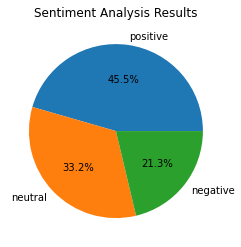

In [16]:
sentiment_counts = rcn['sentiment'].value_counts()

# plot the results as a pie chart
sentiment_counts.plot(kind='pie', autopct='%1.1f%%')

# add a title and axis labels
plt.title('Sentiment Analysis Results')
plt.ylabel('')

# show the plot
plt.show()

# lets also see this relative to the query and see if anything changes 



In [17]:
#canadian navy 
cannav = rcn.loc[rcn['query'].str.contains('canadiannavy')]
#rcn
rcn1 = rcn.loc[rcn['query'].str.contains('rcn')]
#royal canadian navy 
rocannav = rcn.loc[rcn['query'].str.contains('royal Canadian navy')]

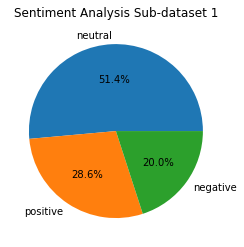

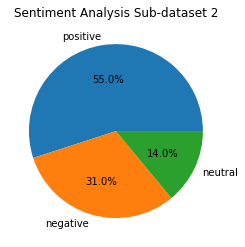

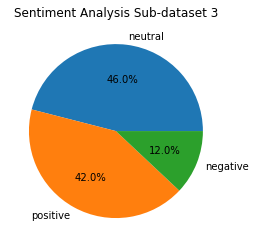

In [18]:
# Create a list of the sub dataframes
sub_dfs = [cannav,rcn1, rocannav]

# Loop through each sub dataframe
for i, sub_df in enumerate(sub_dfs):
  
    sentiment_counts = sub_df['sentiment'].value_counts()

    # plot the results as a pie chart
    sentiment_counts.plot(kind='pie', autopct='%1.1f%%')

    # add a title and axis labels
    plt.title(f"Sentiment Analysis Sub-dataset {i+1}")
    plt.ylabel('')

    # show the plot
    plt.show()

In [19]:
!pip install wordcloud
from wordcloud import WordCloud

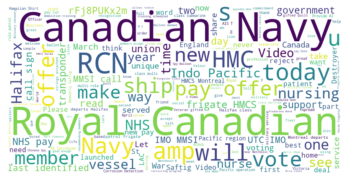

In [20]:
from wordcloud import WordCloud

# Extract the text from a column and concatenate it into a single string
text1 = ' '.join(rcn['content'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text1)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

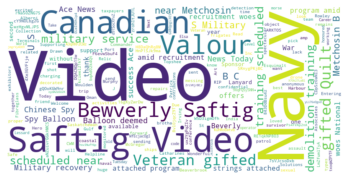

In [21]:
# Extract the text from a column and concatenate it into a single string
text2 = ' '.join(cannav['content'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text2)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

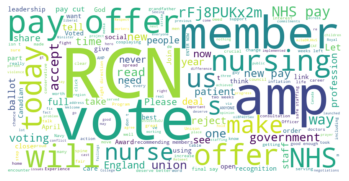

In [22]:
# Extract the text from a column and concatenate it into a single string
text3 = ' '.join(rcn1['content'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text3)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

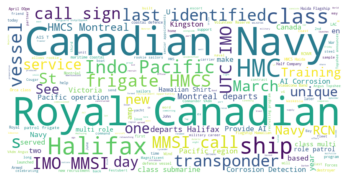

In [23]:
# Extract the text from a column and concatenate it into a single string
text4 = ' '.join(rocannav['content'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text4)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

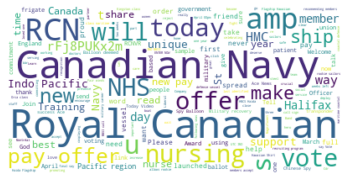

In [24]:
# Positive 
# Filter the dataframe to select only the rows where the column has the desired value
subset = rcn[rcn['sentiment'] == 'positive']

# Extract the text from the filtered subset of rows and concatenate it into a single string
text5 = ' '.join(subset['content'].astype(str))

# Create a WordCloud object with the desired settings
wordcloud = WordCloud(background_color='white').generate(text5)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

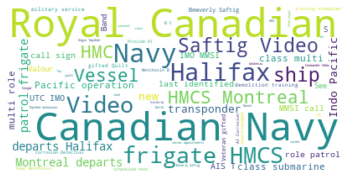

In [25]:
# neutral
# Filter the dataframe to select only the rows where the column has the desired value
subset = rcn[rcn['sentiment'] == 'neutral']

# Extract the text from the filtered subset of rows and concatenate it into a single string
text6 = ' '.join(subset['content'].astype(str))

# Create a WordCloud object with the desired settings
wordcloud = WordCloud(background_color='white').generate(text6)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

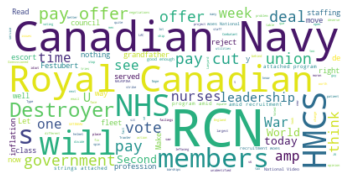

In [26]:
# negative
# Filter the dataframe to select only the rows where the column has the desired value
subset = rcn[rcn['sentiment'] == 'negative']

# Extract the text from the filtered subset of rows and concatenate it into a single string
text7 = ' '.join(subset['content'].astype(str))

# Create a WordCloud object with the desired settings
wordcloud = WordCloud(background_color='white').generate(text7)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

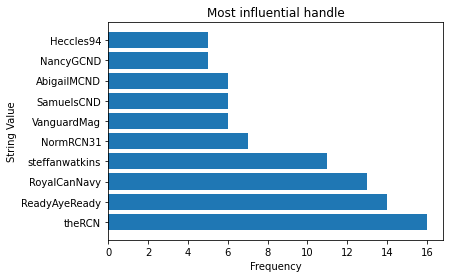

In [27]:
# Which users are the most influential in shaping the conversation?
freq = rcn['twitterProfile'].value_counts()

# Get the top 10 most frequent string values and their counts
top_n = 10
top_n_values = freq.index[:top_n]
top_n_counts = freq.values[:top_n]

# Plot the horizontal bar chart
plt.barh(top_n_values, top_n_counts)
plt.title('Most influential handle'.format(top_n))
plt.xlabel('Frequency')
plt.ylabel('String Value')

plt.show()

In [31]:
!pip install --upgrade xlsxwriter

In [33]:
rcn.to_excel('RCN.xlsx', index=False)

<ipython-input-33-cb40410a1542>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  rcn.to_excel('RCN.xlsx', index=False)
